In [1]:
import numpy as np
from pandas import Series
import seaborn as sns
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [2]:
# Now you can work with the DataFrame
CAMP = "GOM22SU"
STN = "St.14"
TREAT = "PWD"

str_id = f"St."

# Read Excel file and convert it to CSV

#{CAMP}_{STN}_{TREAT}_areas

excel_file = f"../Dissertation_projects/Data/CNS/EXCEL_EXPORTS/{CAMP}_{STN}_{TREAT}_areas.XLS"
csv_file = f"../Dissertation_projects/Data/CNS/EXPORTS/CSV_EXPORT/{CAMP}_{STN}_{TREAT}_areas.csv"

df = pd.read_excel(excel_file)
df.to_csv(csv_file, index=False, header=False)

# Read CSV file and create a DataFrame
column_names = ['name', 'file', 'date', 'time', 'type', 'wtd', 'Unnamed_1', 'Unnamed_2', 'Unnamed_3','Unnamed_4', 'N_area', 'C_area', 'S_area']  
df = pd.read_csv(csv_file, names=column_names)

#Save_name = '../Dissertation_projects/Data/CNS/Data/GOM22SP_HCL_St.14_HCL.csv'
#plot_Save_name = '../Dissertation_projects/Data/CNS/Data/curve_GOM22SP_HCL_St.14_HCL.png'

Save_name = f"../Dissertation_projects/Data/CNS/EXPORTS/FINALIZED_DATA/{CAMP}_{STN}_{TREAT}.csv"
plot_Save_name = f"../Dissertation_projects/Data/CNS/EXPORTS/CURVE_PNG/{CAMP}_{STN}_{TREAT}.png"

df

WARNING *** file size (59945) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,name,file,date,time,type,wtd,Unnamed_1,Unnamed_2,Unnamed_3,Unnamed_4,N_area,C_area,S_area
0,Blank,DfchA002,01/05/2024,10:02,Blank,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.364250e+04,0.0
0,Blank,DfchA003,01/05/2024,10:14,Blank,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.361700e+04,0.0
0,Cystine_bypass,Cystine_bypass,01/05/2024,10:26,By-Pass,NaN,NaN,NaN,NaN,NaN,2.248454e+05,1.348906e+06,434018.5
0,LOW STD,LOW STD,01/05/2024,10:38,STD,1.706,6.25,0.0,NaN,NaN,5.013140e+05,2.912783e+06,998627.0
0,MID STD,MID STD,01/05/2024,10:50,STD,3.501,6.25,0.0,NaN,NaN,1.072676e+06,5.942115e+06,2051555.0
0,HIGH STD,HIGH STD,01/05/2024,11:02,STD,6.455,6.25,0.0,NaN,NaN,1.979524e+06,1.086656e+07,3870905.5
0,Blank,DfchA004,01/05/2024,11:14,Blank,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.580200e+04,5108.0
0,Blank,DfchA005,01/05/2024,11:26,Blank,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.602000e+04,0.0
0,Blank,DfchA006,01/05/2024,11:38,Blank,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.286400e+04,0.0
0,Blank,DfchA007,01/05/2024,11:51,Blank,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.604700e+04,0.0


In [3]:
# Calculate mean for rows where type is blank
blank_rows = df[df['name'] == 'Blank']
mean_values = blank_rows[['C_area', 'N_area', 'S_area']].mean()

# Subtract mean from respective columns and create new rows
df['N_area_bl'] = df['N_area'] - mean_values['N_area']
df['C_area_bl'] = df['C_area'] - mean_values['C_area']
df['S_area_bl'] = df['S_area'] - mean_values['S_area']

blank_mean_N = mean_values['N_area'].astype(str)
blank_mean_C = mean_values['C_area'].astype(str)
blank_mean_S = mean_values['S_area'].astype(str)

print("mean N blanks: " + blank_mean_N)
print("mean C blanks: " + blank_mean_C)
print("mean S blanks: " + blank_mean_S)

mean N blanks: 434437.18645833334
mean C blanks: 12825.536458333334
mean S blanks: 1016.2


In [4]:
# Calculate C N S wights 
std = df[df['type'] == 'STD']

# Subtract mean from respective columns and create new rows
std['N_wtd'] = std['wtd'] * .1165
std['C_wtd'] = std['wtd'] * .3
std['S_wtd'] = std['wtd'] * .2666

std

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7300\2391499534.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std['N_wtd'] = std['wtd'] * .1165
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7300\2391499534.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  std['C_wtd'] = std['wtd'] * .3
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7300\2391499534.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,name,file,date,time,type,wtd,Unnamed_1,Unnamed_2,Unnamed_3,Unnamed_4,N_area,C_area,S_area,N_area_bl,C_area_bl,S_area_bl,N_wtd,C_wtd,S_wtd
0,LOW STD,LOW STD,01/05/2024,10:38,STD,1.706,6.25,0.0,NaN,NaN,501314.000,2912783.0,998627.0,6.687681e+04,2.899957e+06,997610.8,0.198749,0.5118,0.454820
0,MID STD,MID STD,01/05/2024,10:50,STD,3.501,6.25,0.0,NaN,NaN,1072676.000,5942115.0,2051555.0,6.382388e+05,5.929289e+06,2050538.8,0.407867,1.0503,0.933367
0,HIGH STD,HIGH STD,01/05/2024,11:02,STD,6.455,6.25,0.0,NaN,NaN,1979523.625,10866565.0,3870905.5,1.545086e+06,1.085374e+07,3869889.3,0.752008,1.9365,1.720903


In [5]:
y = std['C_wtd']
x = std['C_area_bl']
C_coefficients = np.polyfit(x, y, 1)
C_slope = C_coefficients[0]
C_int = C_coefficients[1]


y = std['N_wtd']
x = std['N_area_bl']
N_coefficients = np.polyfit(x, y, 1)
N_slope = N_coefficients[0]
N_int = N_coefficients[1]


y = std['S_wtd']
x = std['S_area_bl']
S_coefficients = np.polyfit(x, y, 1)
S_slope = S_coefficients[0]
S_int = S_coefficients[1]

print(f"SLOPE")
print(f"Carbon slope:   {C_slope}")
print(f"Nitrogen slope: {N_slope}")
print(f"Sulfur slope:   {S_slope}")
print(f"")

print(f"INTERCEPT")
print(f"Carbon int:   {C_int}")
print(f"Nitrogen int: {N_int}")
print(f"Sulfur int:   {S_int}")
print(f"")

# Subtract mean from respective columns and create new rows
df['N_wtd'] = (df['N_area_bl'] * N_slope) + N_int
df['C_wtd'] = (df['C_area_bl'] * C_slope) + C_int
df['S_wtd'] = (df['S_area_bl'] * S_slope) + S_int

# Subtract mean from respective columns and create new rows
df['N%'] = df['N_wtd'] / df['wtd'] *100
df['C%'] = df['C_wtd'] / df['wtd'] *100
df['S%'] = df['S_wtd'] / df['wtd'] *100

cs = df[df['name'].str.contains('e_CS')]
cs['cs_N%'] = cs['N%']/ .1165 
cs['cs_C%'] = cs['C%']/ .3 
cs['cs_S%'] = cs['S%']/ .2666 

ca = df[df['name'].str.contains('3_CS')]
ca['ca_C%'] = ca['C%']/.1199 

print(f"Check Standerd % est")
print('Nitrogen')
print(cs['cs_N%'])
print('Carbon')
print(cs['cs_C%'])
print('Sulfer')
print(cs['cs_S%'])
print('CaCO3')
print(ca['ca_C%'])




SLOPE
Carbon slope:   1.7920310648380813e-07
Nitrogen slope: 3.7475200874862696e-07
Sulfur slope:   4.3992156665449347e-07

INTERCEPT
Carbon int:   -0.009550768692839265
Nitrogen int: 0.17178508527224065
Sulfur int:   0.021898229645091073

Check Standerd % est
Nitrogen
0    500.023474
0     95.353709
Name: cs_N%, dtype: float64
Carbon
0    103.108531
0    101.931740
Name: cs_C%, dtype: float64
Sulfer
0    55.095782
0    51.457095
Name: cs_S%, dtype: float64
CaCO3
Series([], Name: ca_C%, dtype: float64)


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7300\766616129.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs['cs_N%'] = cs['N%']/ .1165
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7300\766616129.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs['cs_C%'] = cs['C%']/ .3
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_7300\766616129.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

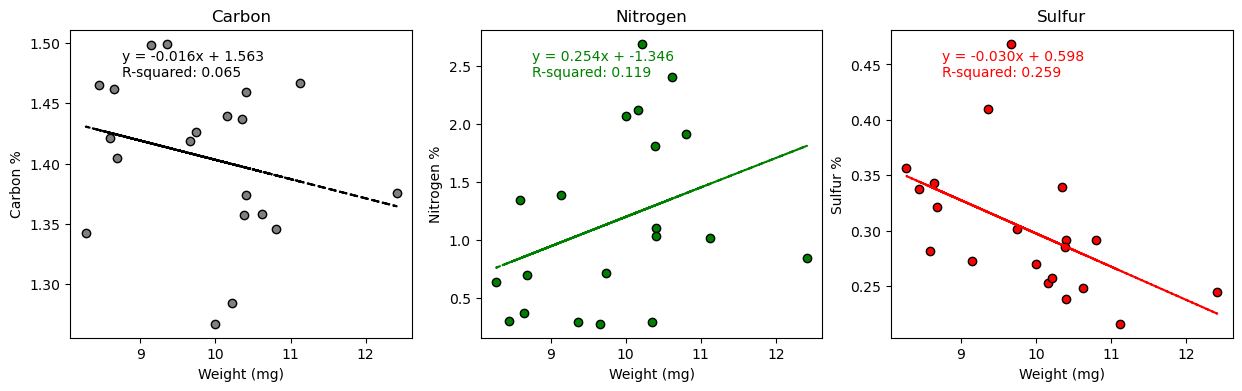

In [6]:
df = df[df['name'].str.contains(str_id)]

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

df = df.dropna(subset=["C%"])

# Scatter plot and linear regression for C_wtd vs C_area
ax = axes[0]
ax.scatter(df['wtd'], df['C%'], facecolor='grey', edgecolor='black')
x = df['wtd']
y = df['C%']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='black', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Weight (mg)')
ax.set_ylabel('Carbon %')
ax.set_title('Carbon')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='black')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='black')

# Scatter plot and linear regression for N_wtd vs N_area
ax = axes[1]
ax.scatter(df['wtd'], df['N%'], facecolor='green', edgecolor='black')
x = df['wtd']
y = df['N%']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='green', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Weight (mg)')
ax.set_ylabel('Nitrogen %')
ax.set_title('Nitrogen')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='green')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='green')

# Scatter plot and linear regression for S_wtd vs S_area
ax = axes[2]
ax.scatter(df['wtd'], df['S%'], facecolor='red', edgecolor='black')
x = df['wtd']
y = df['S%']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='red', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Weight (mg)')
ax.set_ylabel('Sulfur %')
ax.set_title('Sulfur')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='red')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='red')

# show plot
plt.show()

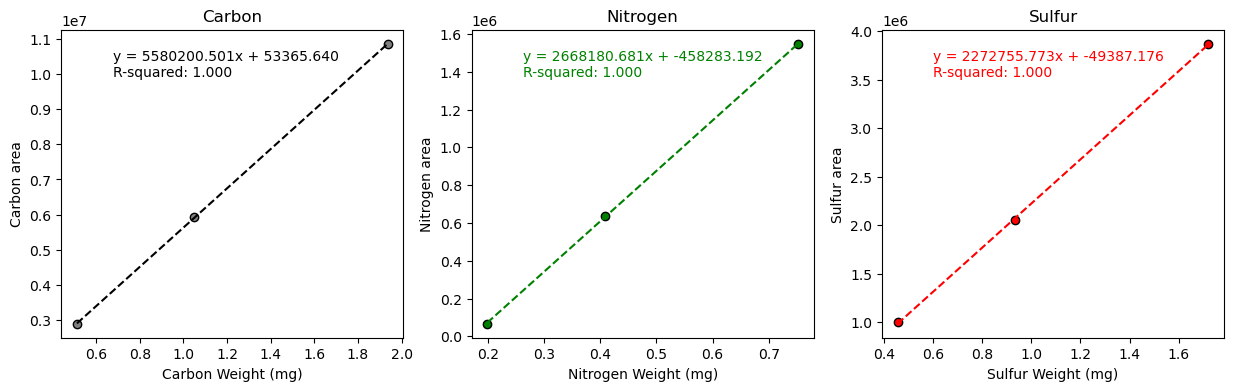

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Scatter plot and linear regression for C_wtd vs C_area
ax = axes[0]
ax.scatter(std['C_wtd'], std['C_area_bl'], facecolor='grey', edgecolor='black')
x = std['C_wtd']
y = std['C_area_bl']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='black', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Carbon Weight (mg)')
ax.set_ylabel('Carbon area')
ax.set_title('Carbon')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='black')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='black')

# Scatter plot and linear regression for N_wtd vs N_area
ax = axes[1]
ax.scatter(std['N_wtd'], std['N_area_bl'], facecolor='green', edgecolor='black')
x = std['N_wtd']
y = std['N_area_bl']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='green', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Nitrogen Weight (mg)')
ax.set_ylabel('Nitrogen area')
ax.set_title('Nitrogen')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='green')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='green')

# Scatter plot and linear regression for S_wtd vs S_area
ax = axes[2]
ax.scatter(std['S_wtd'], std['S_area_bl'], facecolor='red', edgecolor='black')
x = std['S_wtd']
y = std['S_area_bl']
coefficients = np.polyfit(x, y, 1)
slope = coefficients[0]
line = np.poly1d(coefficients)
ax.plot(x, line(x), color='red', linestyle='--')
residuals = y - line(x)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
ax.set_xlabel('Sulfur Weight (mg)')
ax.set_ylabel('Sulfur area')
ax.set_title('Sulfur')
equation = f"y = {slope:.3f}x + {coefficients[1]:.3f}"
r2_text = f"R-squared: {r_squared:.3f}"
ax.text(0.15, 0.90, equation, transform=ax.transAxes, fontsize=10, color='red')
ax.text(0.15, 0.85, r2_text, transform=ax.transAxes, fontsize=10, color='red')

#save plot 
plt.savefig(plot_Save_name)

# show plot
plt.show()

In [8]:
ds = df[df['name'].str.contains(str_id)]
ds['ID'] = ds['name'].str[:]
ds['Treat'] = TREAT
ds['Camp'] = CAMP
ds['Station'] = STN
ds['notes'] = "N CS high, S CS Low"

selected_columns = ['ID', 'Treat', 'Camp', 'Station', 'N%', 'C%', 'S%', 'notes']
ds = ds[selected_columns]

ds.to_csv(Save_name, index=False, header=True)

print(f"Check Standerd % est")
print('Nitrogen')
print(cs['cs_N%'])
print('Carbon')
print(cs['cs_C%'])
print('Sulfer')
print(cs['cs_S%'])
print('CaCO3')
print(ca['ca_C%'])

ds

Check Standerd % est
Nitrogen
0    500.023474
0     95.353709
Name: cs_N%, dtype: float64
Carbon
0    103.108531
0    101.931740
Name: cs_C%, dtype: float64
Sulfer
0    55.095782
0    51.457095
Name: cs_S%, dtype: float64
CaCO3
Series([], Name: ca_C%, dtype: float64)


,ID,Treat,Camp,Station,N%,C%,S%,notes
0,GOM22SU_St.14_PWD_01,PWD,GOM22SU,St.14,0.275213,1.418378,0.468699,S CS Low
0,GOM22SU_St.14_PWD_02,PWD,GOM22SU,St.14,0.286462,1.437216,0.339300,S CS Low
0,GOM22SU_St.14_PWD_03,PWD,GOM22SU,St.14,0.297147,1.465128,0.337562,S CS Low
0,GOM22SU_St.14_PWD_04,PWD,GOM22SU,St.14,0.293803,1.499482,0.409500,S CS Low
0,GOM22SU_St.14_PWD_05,PWD,GOM22SU,St.14,1.389277,1.498406,0.272253,S CS Low
0,GOM22SU_St.14_PWD_06,PWD,GOM22SU,St.14,1.344728,1.421412,0.281536,S CS Low
0,GOM22SU_St.14_PWD_07,PWD,GOM22SU,St.14,1.101702,1.459636,0.238648,S CS Low
0,GOM22SU_St.14_PWD_08,PWD,GOM22SU,St.14,0.363955,1.461813,0.343415,S CS Low
0,GOM22SU_St.14_PWD_09,PWD,GOM22SU,St.14,1.018240,1.467107,0.215994,S CS Low
0,GOM22SU_St.14_PWD_10,PWD,GOM22SU,St.14,0.712861,1.426315,0.301469,S CS Low
